In [1]:
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline
from PIL import Image
import numpy as np
from augmentation import color_seq
from IPython.display import Image
from IPython.core.display import HTML

DATA_DIR = '/media/hdd10tb/zchen/dsb2018/data'

In [2]:
def scale_image_canals(image):
    for i in range(image.shape[2]):
        canal = image[:,:,i]
        canal = canal - canal.min()
        canalmax = canal.max()
        if canalmax > 0:
            factor = 255/canalmax
            canal = (canal * factor).astype(int)
        image[:,:,i] = canal
    return image

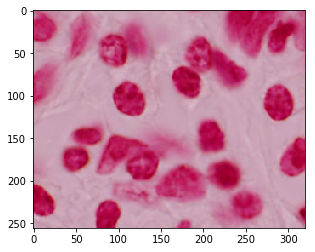

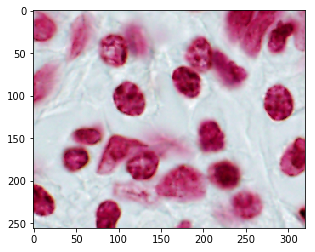

In [8]:
id_ = 'a5fe0b7412dd152c41f7afc34ffdf276d4261b6942fa6d36803648e90f2cfc06'
# id_ = '091944f1d2611c916b98c020bd066667e33f4639159b2a92407fe5a40788856d'
# id_ = '623cf6987b3fac8f384c09f40d98c5e739c097aa9a9627054542aa27f7d38db1'
image = cv2.imread(DATA_DIR + '/zhen/stage1_train/images/%s.png'%(id_), 1)[:,:,:3]
plt.imshow(image)
plt.show()
plt.imshow(scale_image_canals(image))
plt.show()

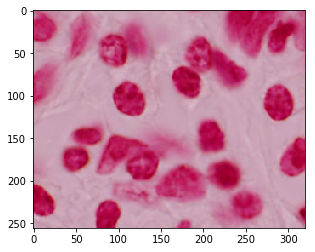

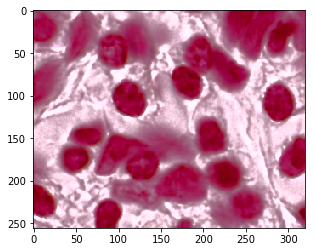

In [9]:
img = cv2.imread(DATA_DIR + '/zhen/stage1_train/images/%s.png'%(id_), 1)[:,:,:3]
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# equ = cv2.equalizeHist(img)
# res = np.hstack((img,img_output)) #stacking images side-by-side
plt.imshow(img)
plt.show()
plt.imshow(img_output)
plt.show()

## More strategies

1. For each crop feature, do some augmentation (e.g. flip ). for each augmented feature, predict mask. here is how it look like:

green: average of all mask prediction. red: prediction for augmented crop features

In [66]:
Image(url= "https://kaggle2.blob.core.windows.net/forum-message-attachments/298387/8815/average1.png")

2.  further refine and improve the mask boundary using post processing

In [67]:
Image(url= "https://kaggle2.blob.core.windows.net/forum-message-attachments/298070/8802/3582166ee20755856adf4882a8bfacb616fce4247911605a109c4862de421bcd.png")

In [ ]:
https://www.kaggle.com/c/data-science-bowl-2018/discussion/52621